**Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline 
sns.set(style="ticks")

In [3]:
data=pd.read_csv('google-play-store-apps/googleplaystore.csv')

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
data.shape

(10841, 13)

In [17]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 10841


# Обработка пропусков в данных

In [8]:
# проверим, есть ли пропущенные значения
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Простые стратегии - удаление или заполнение нулями

In [9]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((10841, 13), (10841, 8))

In [10]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((10841, 13), (9360, 13))

In [12]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)

In [13]:
data_new_1.isnull().sum()

App             0
Category        0
Reviews         0
Size            0
Installs        0
Price           0
Genres          0
Last Updated    0
dtype: int64

In [14]:
data_new_2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [15]:
data_new_3.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## "Внедрение значений" - импьютация

### Обработка пропусков в числовых данных

In [18]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Rating. Тип данных float64. Количество пустых значений 1474, 13.6%.


In [19]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3
...,...
10836,4.5
10837,5.0
10838,NaN
10839,4.5


q:\python\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
q:\python\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


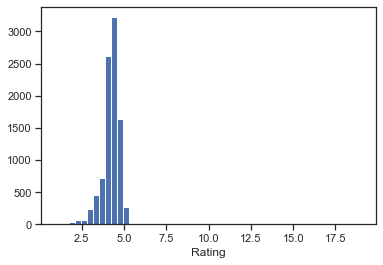

In [20]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [21]:
# Фильтр по пустым значениям поля Rating 
data[data['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [22]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['Rating'].isnull()].index
flt_index

Int64Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,
              185,
            ...
            10816, 10818, 10821, 10822, 10823, 10824, 10825, 10831, 10835,
            10838],
           dtype='int64', length=1474)

In [23]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [24]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['Rating']

23      NaN
113     NaN
123     NaN
126     NaN
129     NaN
         ..
10824   NaN
10825   NaN
10831   NaN
10835   NaN
10838   NaN
Name: Rating, Length: 1474, dtype: float64

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html#impute

In [25]:
data_num_Rating = data_num[['Rating']]
data_num_Rating.head()

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3


In [26]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [27]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Rating)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [28]:
strategies=['mean', 'median','most_frequent']
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Rating)
    return data_num_imp[mask_missing_values_only]

In [33]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([4.19333832, 4.19333832, 4.19333832, ..., 4.19333832, 4.19333832,
        4.19333832]))

In [34]:
strategies[1], test_num_impute(strategies[1])

('median', array([4.3, 4.3, 4.3, ..., 4.3, 4.3, 4.3]))

In [35]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([4.4, 4.4, 4.4, ..., 4.4, 4.4, 4.4]))

In [36]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [37]:
data[['Rating']].describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [41]:
test_num_impute_col(data, 'Rating', strategies[0])

('Rating', 'mean', 1474, 4.193338315362443, 4.193338315362443)

In [42]:
test_num_impute_col(data, 'Rating', strategies[1])

('Rating', 'median', 1474, 4.3, 4.3)

In [43]:
test_num_impute_col(data, 'Rating', strategies[2])

('Rating', 'most_frequent', 1474, 4.4, 4.4)

### Обработка пропусков в категориальных данных

In [44]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Type. Тип данных object. Количество пустых значений 1, 0.01%.
Колонка Content Rating. Тип данных object. Количество пустых значений 1, 0.01%.
Колонка Current Ver. Тип данных object. Количество пустых значений 8, 0.07%.
Колонка Android Ver. Тип данных object. Количество пустых значений 3, 0.03%.


In [49]:
cat_temp_data = data[['Android Ver']]
cat_temp_data.head()

,Android Ver
0,4.0.3 and up
1,4.0.3 and up
2,4.0.3 and up
3,4.2 and up
4,4.4 and up


In [50]:
cat_temp_data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [51]:
cat_temp_data[cat_temp_data['Android Ver'].isnull()].shape

(3, 1)

In [52]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['4.0.3 and up'],
       ['4.0.3 and up'],
       ['4.0.3 and up'],
       ...,
       ['2.2 and up'],
       ['Varies with device'],
       ['Varies with device']], dtype=object)

In [53]:
# Пустые значения (nan) отсутствуют
np.unique(data_imp2)

array(['1.0 and up', '1.5 and up', '1.6 and up', '2.0 and up',
       '2.0.1 and up', '2.1 and up', '2.2 - 7.1.1', '2.2 and up',
       '2.3 and up', '2.3.3 and up', '3.0 and up', '3.1 and up',
       '3.2 and up', '4.0 and up', '4.0.3 - 7.1.1', '4.0.3 and up',
       '4.1 - 7.1.1', '4.1 and up', '4.2 and up', '4.3 and up',
       '4.4 and up', '4.4W and up', '5.0 - 6.0', '5.0 - 7.1.1',
       '5.0 - 8.0', '5.0 and up', '5.1 and up', '6.0 and up',
       '7.0 - 7.1.1', '7.0 and up', '7.1 and up', '8.0 and up',
       'Varies with device'], dtype=object)

In [54]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['4.0.3 and up'],
       ['4.0.3 and up'],
       ['4.0.3 and up'],
       ...,
       ['2.2 and up'],
       ['Varies with device'],
       ['Varies with device']], dtype=object)

In [55]:
np.unique(data_imp3)

array(['!!!', '1.0 and up', '1.5 and up', '1.6 and up', '2.0 and up',
       '2.0.1 and up', '2.1 and up', '2.2 - 7.1.1', '2.2 and up',
       '2.3 and up', '2.3.3 and up', '3.0 and up', '3.1 and up',
       '3.2 and up', '4.0 and up', '4.0.3 - 7.1.1', '4.0.3 and up',
       '4.1 - 7.1.1', '4.1 and up', '4.2 and up', '4.3 and up',
       '4.4 and up', '4.4W and up', '5.0 - 6.0', '5.0 - 7.1.1',
       '5.0 - 8.0', '5.0 and up', '5.1 and up', '6.0 and up',
       '7.0 - 7.1.1', '7.0 and up', '7.1 and up', '8.0 and up',
       'Varies with device'], dtype=object)

In [56]:
data_imp3[data_imp3=='!!!'].size

3

# Преобразование категориальных признаков в числовые

In [57]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,4.0.3 and up
1,4.0.3 and up
2,4.0.3 and up
3,4.2 and up
4,4.4 and up
...,...
10836,4.1 and up
10837,4.1 and up
10838,2.2 and up
10839,Varies with device


## Кодирование категорий целочисленными значениями (label encoding)

In [58]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [59]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [60]:
cat_enc['c1'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [61]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [62]:
le.inverse_transform([0, 1, 2, 3])

array(['1.0 and up', '1.5 and up', '1.6 and up', '2.0 and up'],
      dtype=object)

## Кодирование категорий наборами бинарных значений (one-hot encoding)

In [63]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [64]:
cat_enc.shape

(10841, 1)

In [65]:
cat_enc_ohe.shape

(10841, 33)

In [66]:
cat_enc_ohe

<10841x33 sparse matrix of type '<class 'numpy.float64'>'
	with 10841 stored elements in Compressed Sparse Row format>

In [67]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0.,

In [68]:
cat_enc.head(10)

,c1
0,4.0.3 and up
1,4.0.3 and up
2,4.0.3 and up
3,4.2 and up
4,4.4 and up
5,2.3 and up
6,4.0.3 and up
7,4.2 and up
8,3.0 and up
9,4.0.3 and up


## Pandas get_dummies - быстрый вариант one-hot кодирования

In [69]:
pd.get_dummies(cat_enc).head()

,c1_1.0 and up,c1_1.5 and up,c1_1.6 and up,c1_2.0 and up,c1_2.0.1 and up,c1_2.1 and up,c1_2.2 - 7.1.1,c1_2.2 and up,c1_2.3 and up,c1_2.3.3 and up,...,c1_5.0 - 7.1.1,c1_5.0 - 8.0,c1_5.0 and up,c1_5.1 and up,c1_6.0 and up,c1_7.0 - 7.1.1,c1_7.0 and up,c1_7.1 and up,c1_8.0 and up,c1_Varies with device
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Android Ver_1.0 and up,Android Ver_1.5 and up,Android Ver_1.6 and up,Android Ver_2.0 and up,Android Ver_2.0.1 and up,Android Ver_2.1 and up,Android Ver_2.2 - 7.1.1,Android Ver_2.2 and up,Android Ver_2.3 and up,Android Ver_2.3.3 and up,...,Android Ver_5.0 - 8.0,Android Ver_5.0 and up,Android Ver_5.1 and up,Android Ver_6.0 and up,Android Ver_7.0 - 7.1.1,Android Ver_7.0 and up,Android Ver_7.1 and up,Android Ver_8.0 and up,Android Ver_Varies with device,Android Ver_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Масштабирование данных

Термины "масштабирование" и "нормализация" часто используются как синонимы. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины.

Если признаки лежат в различных диапазонах, то необходимо их нормализовать. Как правило, применяют два подхода:

- MinMax масштабирование (в этом случае значения лежат в диапазоне от 0 до 1)
- Масштабирование данных на основе Z-оценки (в этом случае большинство значений попадает в диапазон от -3 до 3)

In [71]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## MinMax масштабирование

In [73]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Rating']])

q:\python\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
q:\python\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


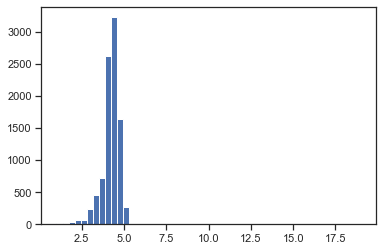

In [74]:
plt.hist(data['Rating'], 50)
plt.show()

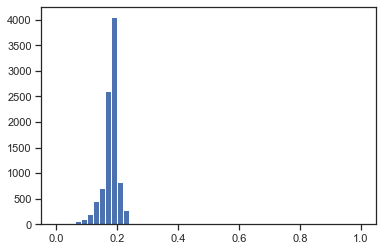

In [75]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе Z-оценки - StandardScaler

In [76]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Rating']])

q:\python\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
q:\python\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


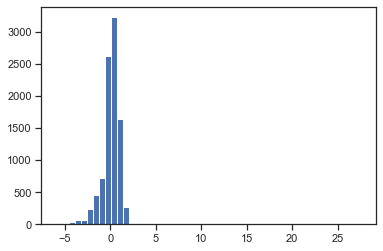

In [77]:
plt.hist(sc2_data, 50)
plt.show()

## Нормализация данных

In [79]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data_new_3[['Rating']])

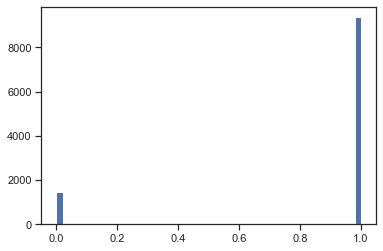

In [80]:
plt.hist(sc3_data, 50)
plt.show()